In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [23]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[.5,1,0],[0,.5,1],[1,0,.5]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the curent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

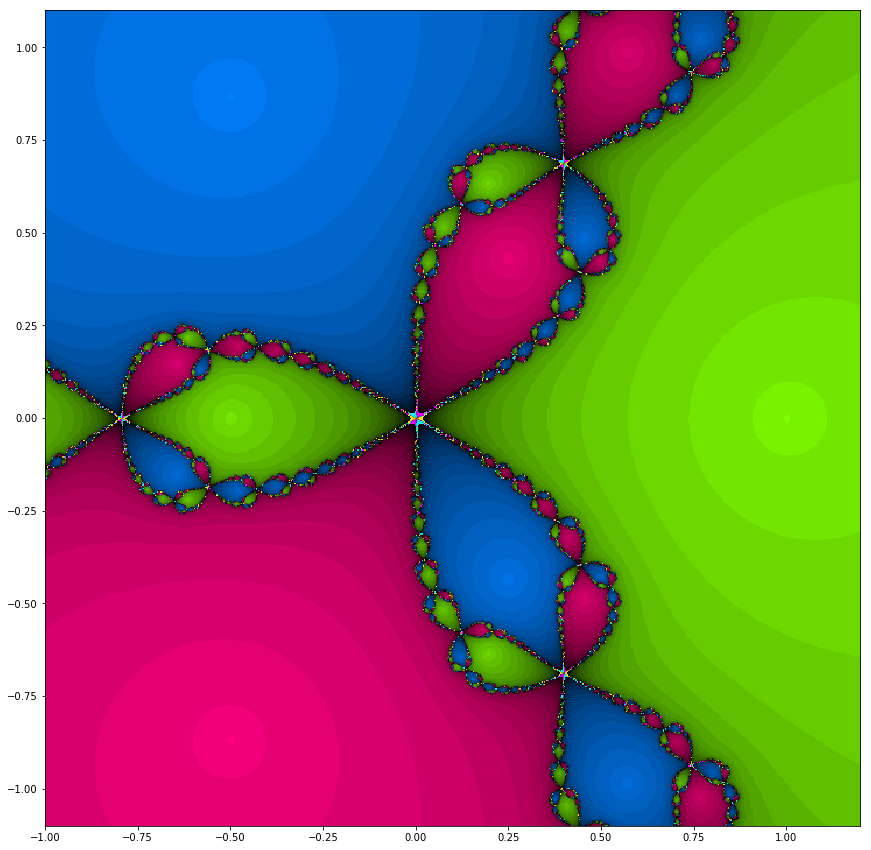

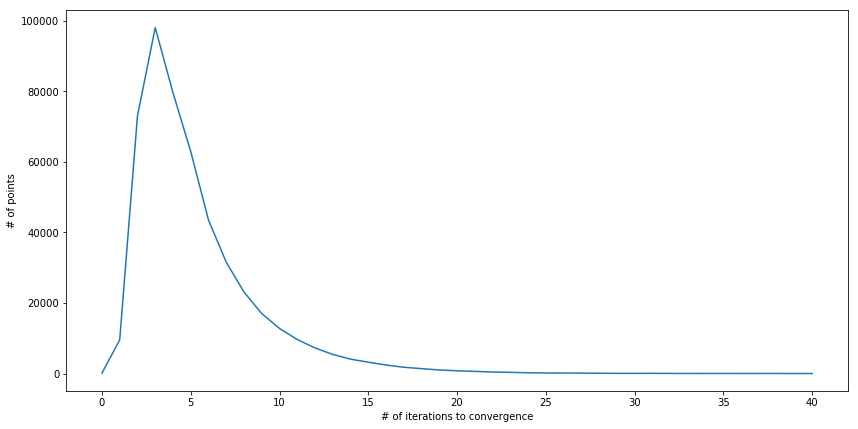

In [24]:
xmin = -1
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phi(z0)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converge
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Question 1 : Why is there a large monochromatic region around each of the roots ?
    
If a large region is in the same color it means all points in that region converge to the same root so this means each root attracts a large number of points around them. Indeed, we know that the Newton Raphson method is extremely efficient for approximating roots if we already have a good idea of where they are. The algorithm roughly doubles the number of corret significant digits at each iteration. So if the initial guess is in the neighborhood of the root already, it will rapidly converge.

Question 2 : Generate a nice fractal by zooming on a boundary between two regions. Try changing the resolution, the color setting and other parameters. Heurastically explain the fractal nature of the boundary.

See code and graph in cell below, I zoomed on the lower part of the boundary between the 2 complex roots of z^3-1.
Since more points are next to a boundary, the convergence is slow for a greater number of points. Thus the program takes longer to run. If we increase the resolution, we increase the number of points we want to plot so the program will take even longer to run. Also since the fractals are already pretty well defined, higher resolution is not necessary. 

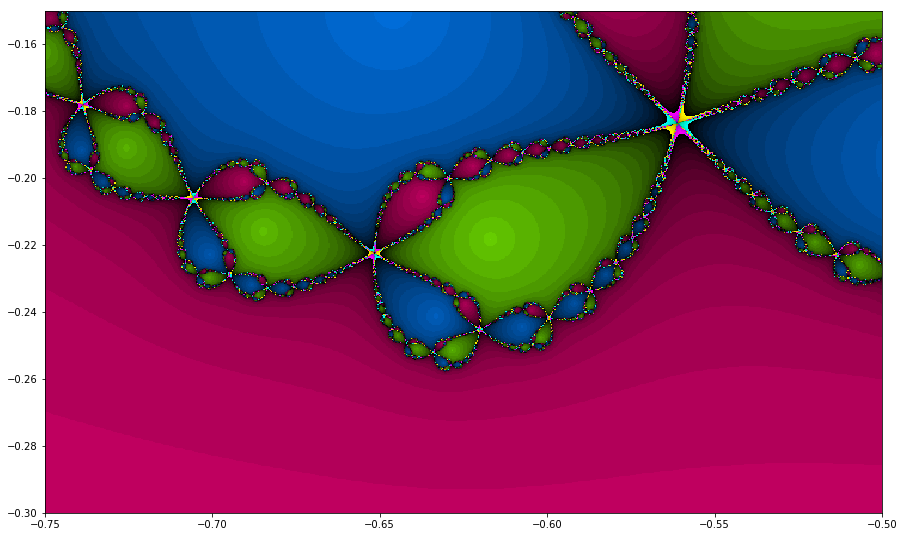

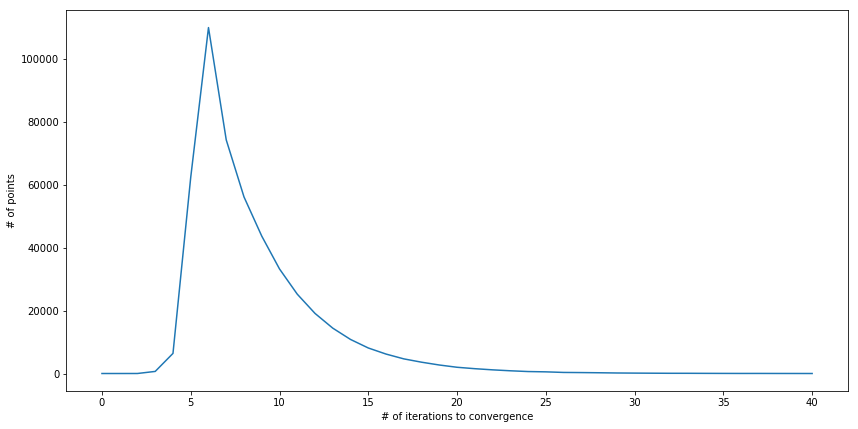

In [25]:
xmin = -0.75
xmax = -0.5
ymin = -0.3
ymax = -0.15
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phi(z0)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converges
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Question 3 : Pick a polynomial or a more general function and modify the code to implement the corresponding Newton-Raphson iteration. Note that you will need to know the roots of the function in the complex plane. Investigate and explain the resulting graphics.

First we note that it is much easier to first pick the roots ai's and then construct o polynomial by multipliying (x-ai) for each ai, since finding the roots of polynomials of order 4 or higher in the complez plane can be very time consuming.
Let the roots be : i, -1 , 1 and -i the function p(z)=z^4-1


In [26]:
#Newton-Raphson iteration for z**4-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z*z)-z)/4
#4th deg roots of 1
zz=[1,complex(0.,1.),complex(0.,-1.),-1]
#corresponding colors
cc=[[.5,1,0],[0,.5,1],[1,0,.5],[1,.5,0]]

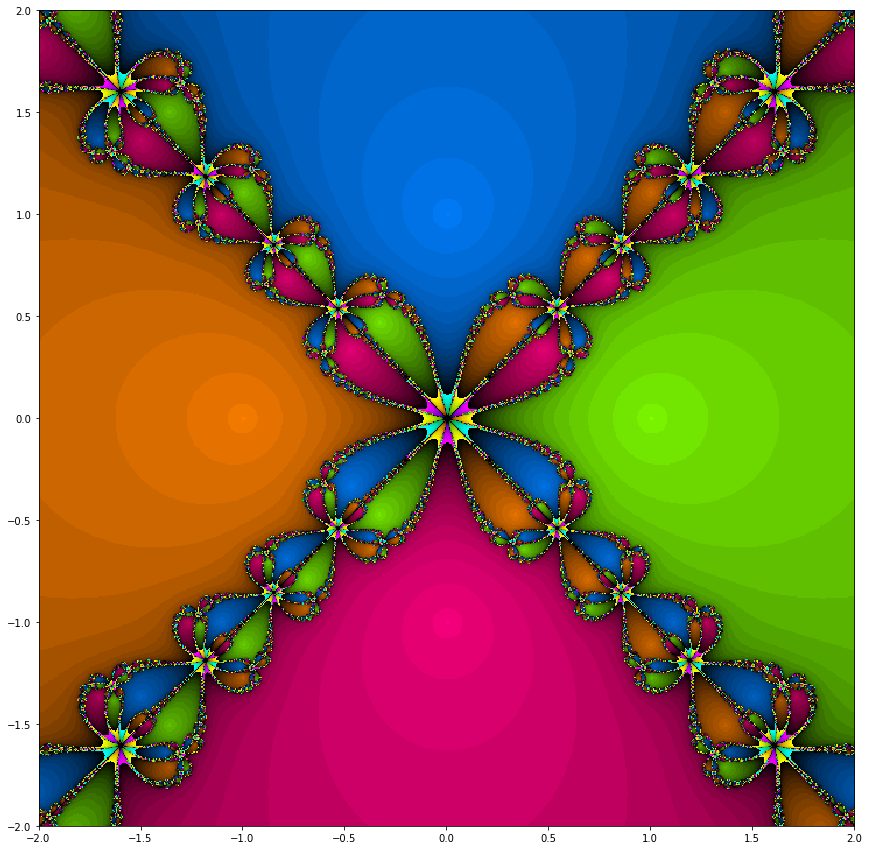

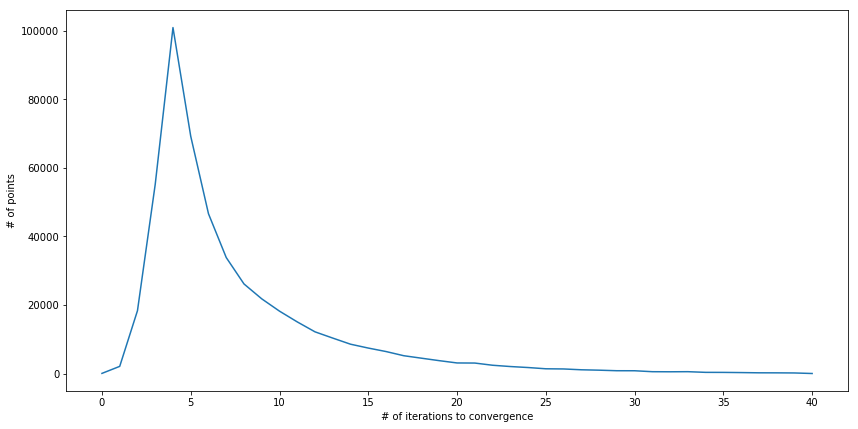

In [27]:
xmin = -2.
xmax = 2.
ymin = -2.
ymax = 2.
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phi(z0)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converges
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Question 4 : Modify the code again to implement Steffensen's iteration for some function f with w a constant real number. The case w=1 is the classical Steffensen Method. Produce graphics for several values of w starting with w=1 and explain the behavior.

See the code cells below. We have produced graphs for w=1, w=2, w=.5.




From the large black areas we can conclude that Steffensen's method only converges if the initial guess is accurate. It is required that we already have some idea of where the root is before starting the computation. Also if we compare the three graphs, we see that the lower w is, the more point converge. This being said, we can note that for the points that do converge, they overall converge just as fast - most of them converge after 4 iterations. 

In [28]:
#Steffenson's iteration for z**3-1=0
def phiS(z,w):
    z=complex(z)
    den=pow(w*z*z*z-w+z,3)-z*z*z #checks if zero division
    if den == 0 : return 0
    return z-w*pow(z*z*z-1,2)/(pow(w*z*z*z-w+z,3)-z*z*z)
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[.5,1,0],[0,.5,1],[1,0,.5]]

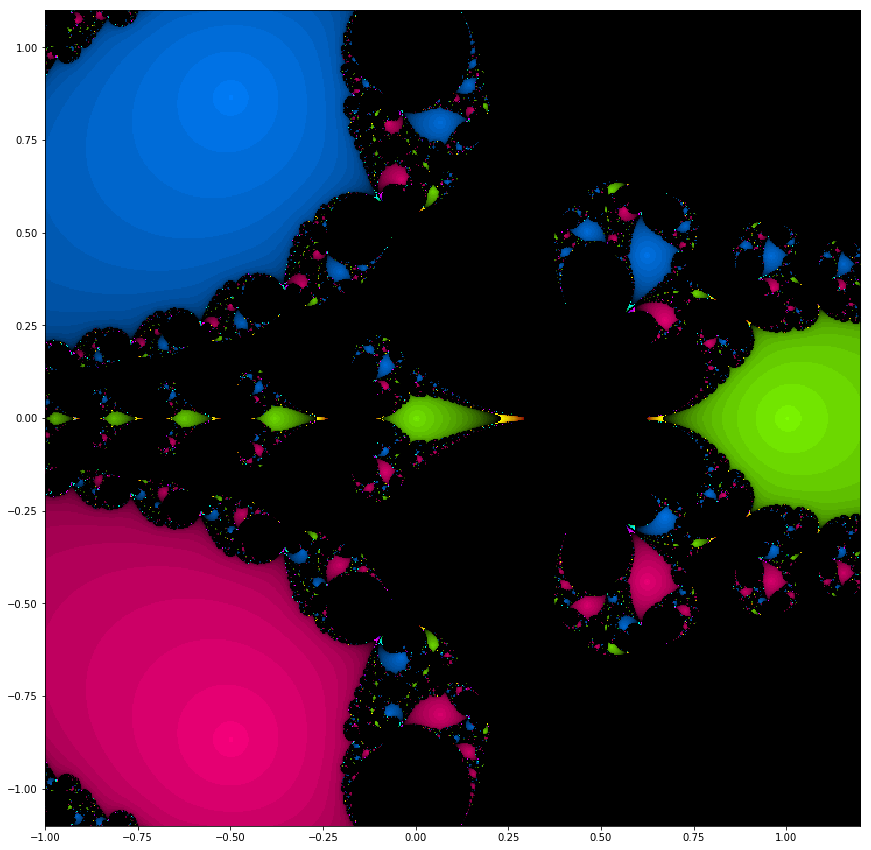

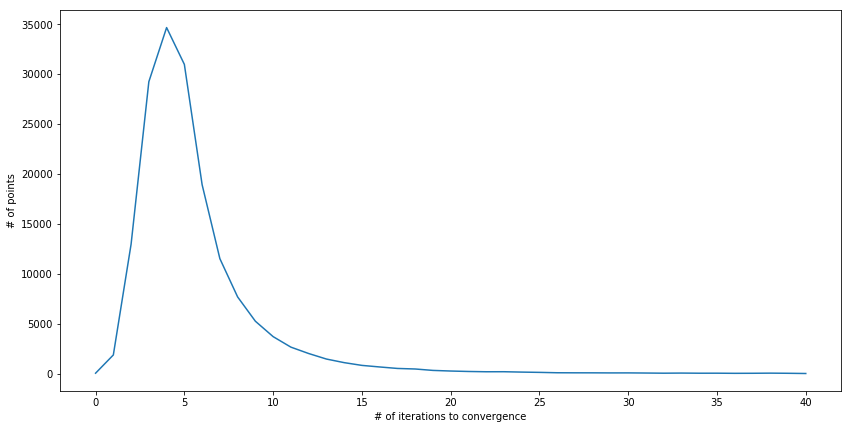

In [32]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
w=1.
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phiS(z0,w)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converge
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

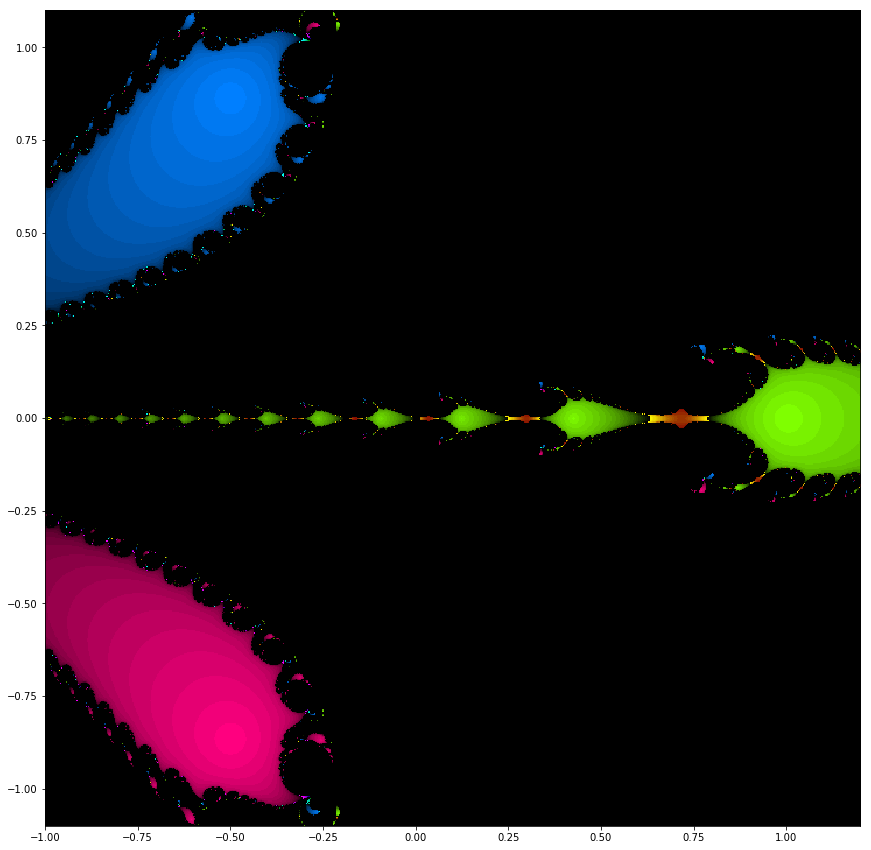

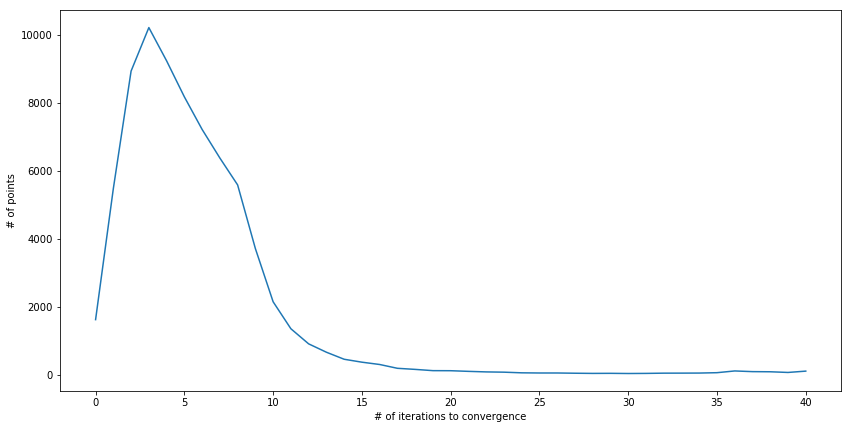

In [30]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
w=2.
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phiS(z0,w)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converge
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

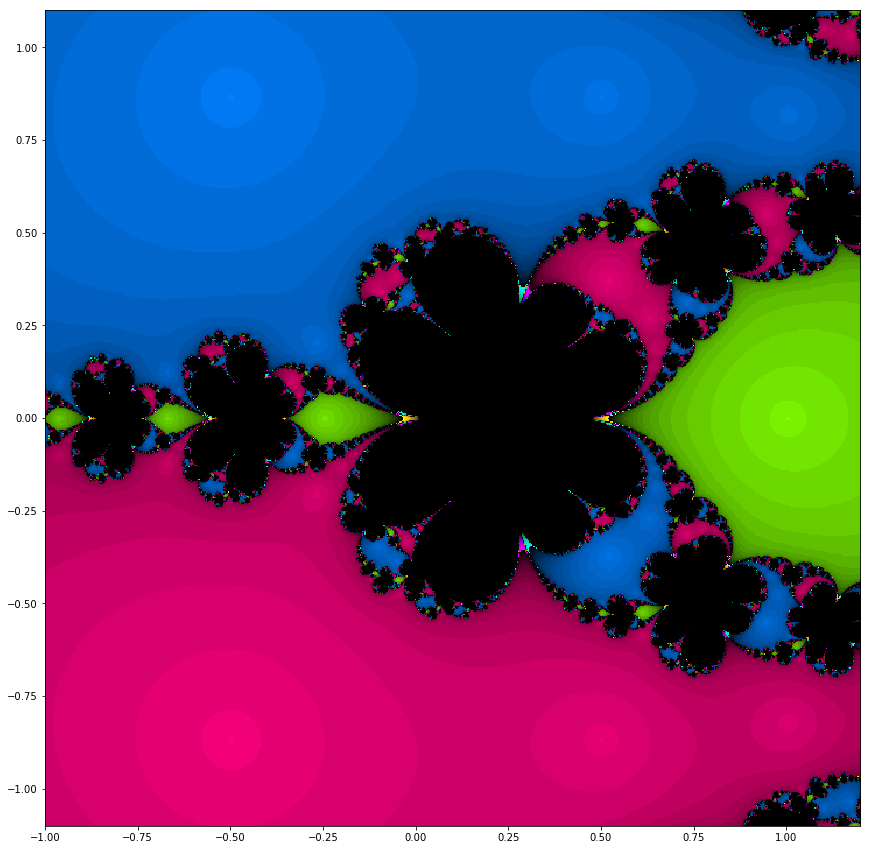

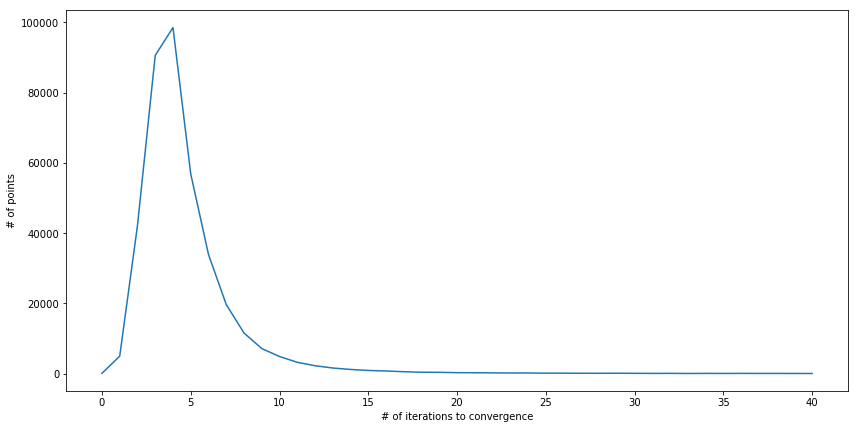

In [33]:
xmin = -1
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
w=.5
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx): ## double for loop to hit every point in the rectangle
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)# ajusts coordinates
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1#adds a one to the shading array
                break
            z=phiS(z0,w)#calculating series
            con=False#WHAT is con?? : con stands for convergence
            for l in range(len(zz)): #for each of the roots
                if abs(z-zz[l])<eps:# if the points we are at converges to one of them
                    con=True
                    break
            if(con): #if it converge
                img[i,j]=[(sit-k)*f*c for c in cc[l]] # takes care of the color depending on what root it conv to
                h[k]+=1 #shades the point according to number of it
                break
            z0=z #if it does nt converge, preps for new iteration
        if k==maxit: h[maxit]+=1 # if we did all 40 it, point is black
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))            ## graph implementation
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Question 5 : By computing the derivative of phi, show that the Steffensen's Method is a locally quadratically convergent method.

